# Функции потерь


#### 1. (R)MSE ((Root) Mean Squared Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N (y_n - \hat{y}_n)^2$$

#### 2. MAE (Mean Absolute Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N |y_n - \hat{y}_n|$$


**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_n^N (y_n - \hat{y}_n)^2}{\sum\limits_n^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_n^N |y_n - \hat{y}_n|}{\sum\limits_n^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_n^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$




**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_n^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

# Искусственные нейронные сети

Считываем набор данных цифр MNIST.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np

In [2]:
digits = load_digits()

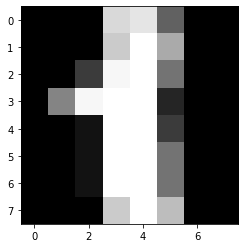

In [3]:
img = digits.images
plt.imshow(img[1], cmap=plt.cm.Greys_r);

In [4]:
X = img.reshape(-1, 64)
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
test_y = test_y.reshape(1, -1)

Персептрон из библиотеки [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

In [5]:
from sklearn.neural_network import MLPClassifier

In [14]:
model = MLPClassifier((128, 64), activation='relu')

In [15]:
train_y

array([1, 3, 3, ..., 3, 4, 4])

In [16]:
model.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
y_hat = model.predict(test_x)

In [18]:
y_hat

array([9, 0, 8, 9, 0, 3, 0, 0, 7, 1, 7, 1, 0, 0, 1, 7, 0, 1, 7, 8, 0, 4,
       3, 6, 0, 2, 5, 0, 0, 9, 8, 6, 1, 1, 3, 3, 0, 1, 7, 9, 4, 2, 9, 5,
       6, 1, 4, 8, 3, 6, 4, 2, 1, 2, 8, 4, 0, 8, 4, 5, 9, 2, 0, 0, 6, 4,
       9, 6, 7, 0, 0, 6, 5, 4, 7, 8, 5, 3, 4, 9, 1, 7, 5, 6, 7, 3, 7, 2,
       4, 6, 1, 5, 9, 6, 9, 3, 8, 3, 0, 3, 2, 1, 3, 0, 6, 0, 2, 4, 9, 5,
       0, 7, 7, 0, 1, 8, 5, 0, 2, 0, 9, 3, 0, 0, 4, 6, 3, 3, 8, 6, 3, 6,
       2, 5, 3, 4, 8, 6, 2, 6, 0, 4, 7, 1, 4, 0, 8, 3, 4, 2, 8, 6, 7, 6,
       9, 8, 3, 5, 1, 8, 9, 1, 3, 1, 3, 2, 9, 0, 7, 0, 7, 8, 8, 9, 2, 4,
       0, 2, 1, 7, 4, 5, 8, 6, 9, 6, 6, 8, 2, 1, 5, 7, 1, 4, 8, 5, 9, 2,
       7, 1, 8, 7, 8, 8, 7, 5, 9, 6, 7, 3, 6, 8, 1, 2, 9, 8, 9, 4, 2, 3,
       6, 3, 7, 6, 6, 5, 3, 8, 0, 4, 8, 6, 5, 9, 8, 3, 5, 1, 9, 0, 8, 3,
       7, 0, 1, 3, 2, 1, 1, 3, 3, 2, 0, 7, 5, 0, 5, 7, 4, 2, 6, 4, 7, 6,
       3, 0, 3, 0, 5, 3, 5, 8, 1, 9, 6, 7, 2, 2, 4, 3, 8, 9, 5, 4, 7, 2,
       7, 4, 8, 5, 1, 7, 2, 9, 5, 2, 9, 7, 0, 3, 9,

In [19]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]])

In [20]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.9       , 1.        , 1.        , 0.96875   ,
        0.96774194, 1.        , 0.97142857, 1.        , 0.96875   ]),
 array([1.        , 1.        , 0.96875   , 0.975     , 1.        ,
        0.9375    , 1.        , 0.97142857, 0.92857143, 1.        ]),
 array([1.        , 0.94736842, 0.98412698, 0.98734177, 0.98412698,
        0.95238095, 1.        , 0.97142857, 0.96296296, 0.98412698]),
 array([47, 36, 32, 40, 31, 32, 34, 35, 42, 31]))

In [21]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9777777777777777

In [37]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_backprop',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_loss_grad_lbfgs',
 '_partial_fit',
 '_predict',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch_size',
 'beta_1',
 'beta_2',
 'early_stopping',
 'epsilon',
 'fit',
 'get_params',
 'hidden_layer_sizes',
 'learning_ra

In [239]:
len(model.coefs_), len(model.coefs_[0])

(3, 64)

In [376]:
model.coefs_[0][:, 10].reshape((8, -1))

array([[-3.61047115e-04,  6.82383477e-08, -3.35580641e-03,
         4.10279976e-02, -5.29807778e-02, -1.01026908e-01,
        -1.28125074e-12,  6.20409165e-05],
       [ 3.99671037e-04, -1.21226659e-12, -1.77193330e-02,
         4.03372272e-02, -1.43856173e-01, -9.74830613e-02,
        -3.27070842e-03,  5.10893961e-04],
       [ 7.14595151e-05,  3.26888675e-02, -1.24170868e-01,
        -1.24974547e-03, -7.06546826e-03,  1.53197840e-01,
        -2.87188207e-12,  2.77389003e-13],
       [-2.93796762e-07,  1.22580850e-01, -6.94314953e-02,
         1.23171173e-01, -5.88514028e-02,  1.02602869e-01,
        -1.05466531e-01, -3.82677341e-04],
       [-8.68085447e-07,  9.71840908e-02,  1.70385071e-02,
        -7.48480014e-02, -5.36987651e-02, -1.30958999e-01,
        -4.28452120e-02,  5.00351366e-04],
       [-1.10774637e-08,  1.22686278e-01,  1.21035401e-02,
        -3.48196376e-03,  1.89765413e-02, -5.89808628e-02,
        -6.43448481e-03, -1.05262900e-15],
       [ 3.96034607e-16, -3.515589

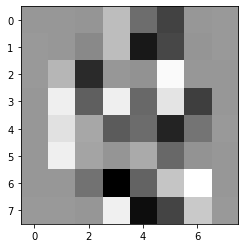

In [375]:
plt.imshow(model.coefs_[0][:, 10].reshape((8, -1)), cmap=plt.cm.Greys_r);

Теперь попробуем сверточные и рекуррентные сети из Keras

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

Хорошо, сперва полносвязанная сеть.

In [24]:
model = keras.Sequential()
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation="softmax"))
model.compile(keras.optimizers.SGD(learning_rate=0.001), 
          keras.losses.MeanSquaredError(reduction='sum'),
          metrics=['accuracy']
         )


In [25]:
train_y2 = []
for y in train_y:
    y2 = np.zeros(10)
    y2[y] = 1
    train_y2.append(y2)
    
test_y2 = []
for y in test_y:
    y2 = np.zeros(10)
    y2[y] = 1
    test_y2.append(y2)
    
train_y2 = np.array(train_y2)
test_y2 = np.array(test_y2)

In [26]:
train_y2

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
model.fit(train_x, train_y2, epochs=200, batch_size=5)

Epoch 1/200
288/288 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.0919
Epoch 2/200
288/288 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.1809
Epoch 3/200
288/288 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.2617
Epoch 4/200
288/288 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.3368
Epoch 5/200
288/288 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.4113
Epoch 6/200
288/288 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.4774
Epoch 7/200
288/288 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.5477
Epoch 8/200
288/288 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.6006
Epoch 9/200
288/288 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.6409
Epoch 10/200
288/288 [==============================] - 0s 1ms/step - loss: 0.4773 - accura

288/288 [==============================] - 0s 950us/step - loss: 0.1933 - accuracy: 0.9944
Epoch 161/200
288/288 [==============================] - 0s 956us/step - loss: 0.1930 - accuracy: 0.9951
Epoch 162/200
288/288 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.9951
Epoch 163/200
288/288 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9951
Epoch 164/200
288/288 [==============================] - 0s 939us/step - loss: 0.1921 - accuracy: 0.9958
Epoch 165/200
288/288 [==============================] - 0s 946us/step - loss: 0.1919 - accuracy: 0.9958
Epoch 166/200
288/288 [==============================] - 0s 986us/step - loss: 0.1916 - accuracy: 0.9958
Epoch 167/200
288/288 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9958
Epoch 168/200
288/288 [==============================] - 0s 980us/step - loss: 0.1910 - accuracy: 0.9958
Epoch 169/200
288/288 [==============================] - 0s 847us/step - lo

In [28]:
y_hat = model.predict(test_x)

In [29]:
y_hat

array([[4.1869823e-02, 4.9551904e-02, 2.6504215e-02, ..., 3.3506027e-01,
        2.4930434e-02, 4.0340304e-01],
       [9.8325515e-01, 3.2749548e-04, 2.4555323e-03, ..., 2.3058847e-04,
        2.4583885e-03, 7.5340224e-04],
       [2.9475856e-04, 1.3350147e-03, 7.0885464e-04, ..., 2.6800681e-04,
        9.7005492e-01, 6.9586486e-03],
       ...,
       [3.7377703e-03, 2.4614888e-01, 3.7104797e-04, ..., 2.9813463e-03,
        2.6165098e-02, 1.7001878e-02],
       [1.0381318e-03, 1.7860746e-02, 1.0308042e-04, ..., 2.8208273e-03,
        2.3291742e-03, 1.5905696e-04],
       [3.5538516e-04, 9.6668822e-01, 2.1955826e-04, ..., 3.9054602e-04,
        1.5489824e-02, 5.5855522e-03]], dtype=float32)

In [30]:
test_y

array([[7, 0, 8, 9, 0, 3, 0, 0, 7, 1, 7, 8, 0, 0, 1, 7, 0, 8, 7, 8, 0, 4,
        3, 6, 0, 2, 5, 0, 0, 9, 8, 6, 1, 1, 3, 3, 0, 1, 7, 9, 4, 2, 9, 5,
        6, 1, 4, 8, 3, 6, 4, 2, 1, 2, 8, 4, 0, 8, 4, 5, 9, 2, 0, 0, 6, 4,
        9, 6, 7, 0, 0, 6, 5, 4, 7, 8, 5, 3, 4, 9, 1, 7, 5, 6, 7, 3, 7, 2,
        4, 6, 1, 5, 9, 6, 9, 3, 8, 3, 0, 3, 2, 1, 3, 0, 6, 0, 2, 4, 9, 5,
        0, 7, 7, 0, 1, 8, 5, 0, 2, 0, 9, 3, 0, 0, 4, 6, 3, 3, 8, 6, 3, 6,
        2, 5, 3, 4, 8, 6, 2, 6, 0, 4, 7, 1, 4, 0, 8, 3, 4, 2, 8, 6, 7, 6,
        9, 8, 3, 5, 1, 8, 9, 1, 3, 1, 3, 2, 9, 0, 7, 0, 7, 8, 8, 9, 2, 4,
        0, 2, 1, 7, 4, 5, 8, 6, 9, 6, 6, 8, 2, 1, 5, 7, 1, 4, 8, 5, 9, 2,
        7, 1, 8, 7, 8, 8, 7, 5, 9, 6, 7, 3, 6, 8, 1, 2, 9, 8, 9, 4, 2, 3,
        6, 3, 7, 6, 6, 5, 3, 8, 0, 4, 8, 6, 5, 9, 8, 3, 5, 1, 9, 0, 8, 3,
        7, 0, 1, 3, 2, 1, 1, 3, 3, 2, 0, 7, 5, 0, 5, 7, 4, 2, 6, 4, 7, 6,
        3, 0, 3, 0, 5, 3, 5, 8, 1, 9, 6, 7, 2, 2, 4, 3, 8, 9, 5, 4, 7, 2,
        7, 5, 8, 5, 1, 2, 2, 9, 5, 2, 

In [31]:
y_hat = [np.argmax(y) for y in y_hat]

In [32]:
y_hat

[9,
 0,
 8,
 9,
 0,
 3,
 0,
 0,
 7,
 1,
 7,
 1,
 0,
 0,
 1,
 7,
 0,
 8,
 7,
 8,
 0,
 4,
 3,
 6,
 0,
 2,
 5,
 0,
 0,
 9,
 8,
 6,
 1,
 1,
 3,
 3,
 0,
 1,
 7,
 9,
 4,
 2,
 9,
 5,
 6,
 1,
 4,
 8,
 3,
 6,
 4,
 2,
 1,
 2,
 6,
 9,
 0,
 8,
 4,
 5,
 9,
 2,
 0,
 0,
 6,
 4,
 9,
 6,
 7,
 0,
 0,
 6,
 5,
 4,
 7,
 8,
 5,
 3,
 4,
 9,
 1,
 7,
 5,
 6,
 7,
 3,
 7,
 2,
 4,
 6,
 1,
 5,
 9,
 6,
 9,
 5,
 8,
 3,
 2,
 3,
 2,
 1,
 3,
 0,
 6,
 0,
 1,
 4,
 9,
 5,
 0,
 4,
 7,
 0,
 1,
 8,
 5,
 0,
 2,
 0,
 9,
 3,
 0,
 0,
 4,
 6,
 3,
 3,
 3,
 6,
 3,
 6,
 2,
 5,
 3,
 4,
 8,
 6,
 2,
 6,
 0,
 4,
 7,
 1,
 4,
 0,
 8,
 3,
 4,
 2,
 8,
 6,
 7,
 6,
 9,
 8,
 3,
 5,
 1,
 8,
 9,
 1,
 3,
 1,
 3,
 2,
 9,
 0,
 7,
 0,
 7,
 8,
 8,
 9,
 2,
 4,
 0,
 2,
 1,
 7,
 4,
 5,
 8,
 6,
 9,
 6,
 6,
 8,
 2,
 1,
 5,
 7,
 1,
 4,
 8,
 5,
 9,
 2,
 7,
 1,
 8,
 4,
 8,
 8,
 7,
 5,
 9,
 6,
 7,
 3,
 6,
 8,
 1,
 2,
 9,
 2,
 9,
 4,
 2,
 3,
 6,
 3,
 7,
 6,
 6,
 5,
 3,
 8,
 0,
 4,
 8,
 6,
 5,
 9,
 8,
 3,
 5,
 1,
 9,
 0,
 8,
 7,
 7,
 0,
 1,
 3,
 2,
 1,
 1,
 3,


In [33]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[46,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 32,  0,  1],
       [ 0,  1,  1,  1,  0,  0,  1,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 30]])

In [34]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.94736842, 0.93939394, 0.94871795, 0.9375    ,
        0.94117647, 0.97142857, 0.96969697, 1.        , 0.9375    ]),
 array([0.9787234 , 1.        , 0.96875   , 0.925     , 0.96774194,
        1.        , 1.        , 0.91428571, 0.9047619 , 0.96774194]),
 array([0.98924731, 0.97297297, 0.95384615, 0.93670886, 0.95238095,
        0.96969697, 0.98550725, 0.94117647, 0.95      , 0.95238095]),
 array([47, 36, 32, 40, 31, 32, 34, 35, 42, 31]))

In [35]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9611111111111111

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


Теперь сверточные сети.

In [36]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001), keras.losses.MeanSquaredError(reduction='sum'))


In [37]:
train_x3 = train_x.reshape(-1, 64, 1)
train_y3 = train_y2.reshape(-1, 10, 1)
test_x3 = test_x.reshape(-1, 64, 1)
test_y3 = test_y2.reshape(-1, 10, 1)

In [38]:
model.fit(train_x3, train_y3, epochs=20)#, validation_data=(test_x3, test_y3))

Epoch 1/20
45/45 [==============================] - 0s 4ms/step - loss: 1.4803
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.3226
Epoch 3/20
45/45 [==============================] - 0s 3ms/step - loss: 0.2087
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1825
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1356
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0772
Epoch 7/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 8/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0657
Epoch 9/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 11/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 12/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 13/20
45/45 [==============================

In [39]:
y_hat = model.predict(test_x3)

In [40]:
y_hat = [np.argmax(y) for y in y_hat]

In [41]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  2,  1,  0],
       [ 0,  2,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]])

In [42]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.9       , 1.        , 1.        , 1.        ,
        0.96875   , 1.        , 0.94444444, 0.97619048, 0.96875   ]),
 array([1.        , 1.        , 1.        , 0.9       , 0.93548387,
        0.96875   , 1.        , 0.97142857, 0.97619048, 1.        ]),
 array([1.        , 0.94736842, 1.        , 0.94736842, 0.96666667,
        0.96875   , 1.        , 0.95774648, 0.97619048, 0.98412698]),
 array([47, 36, 32, 40, 31, 32, 34, 35, 42, 31]))

In [43]:
accuracy_score(test_y.reshape(-1), y_hat)

0.975

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              multiple                  128       
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  3104      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  19210     
Total params: 22,442
Trainable params: 22,442
Non-trainable params: 0
_________________________________________________________________


LSTM

In [44]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64)))
# model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.), 
               keras.losses.MeanSquaredError(reduction='sum'),
               metrics=[keras.metrics.Precision()])



In [45]:
model.fit(train_x3, train_y3, epochs=20)

Epoch 1/20
45/45 [==============================] - 1s 29ms/step - loss: 2.7414 - precision: 1.0000
Epoch 2/20
45/45 [==============================] - 1s 32ms/step - loss: 1.9847 - precision: 0.8953
Epoch 3/20
45/45 [==============================] - 2s 38ms/step - loss: 1.4198 - precision: 0.8925
Epoch 4/20
45/45 [==============================] - 2s 34ms/step - loss: 1.1470 - precision: 0.8889
Epoch 5/20
45/45 [==============================] - 1s 30ms/step - loss: 1.0189 - precision: 0.8721
Epoch 6/20
45/45 [==============================] - 1s 33ms/step - loss: 0.8747 - precision: 0.9176
Epoch 7/20
45/45 [==============================] - 1s 32ms/step - loss: 0.7388 - precision: 0.9158
Epoch 8/20
45/45 [==============================] - 1s 29ms/step - loss: 0.6495 - precision: 0.9193
Epoch 9/20
45/45 [==============================] - 2s 35ms/step - loss: 0.6561 - precision: 0.9108
Epoch 10/20
45/45 [==============================] - 1s 33ms/step - loss: 0.6462 - precision: 0.9034

In [46]:
y_hat = model.predict(test_x3)

In [47]:
y_hat = [np.argmax(y) for y in y_hat]

In [48]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[44,  0,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  1,  0,  0,  0,  3,  0],
       [ 0,  0, 31,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 32,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 29,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 32,  0,  0],
       [ 1,  1,  0,  1,  0,  2,  2,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 29]])

In [49]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([0.97777778, 0.94117647, 0.91176471, 0.88888889, 0.88571429,
        0.74358974, 0.94444444, 0.94117647, 0.92105263, 1.        ]),
 array([0.93617021, 0.88888889, 0.96875   , 0.8       , 1.        ,
        0.90625   , 1.        , 0.91428571, 0.83333333, 0.93548387]),
 array([0.95652174, 0.91428571, 0.93939394, 0.84210526, 0.93939394,
        0.81690141, 0.97142857, 0.92753623, 0.875     , 0.96666667]),
 array([47, 36, 32, 40, 31, 32, 34, 35, 42, 31]))

In [50]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9138888888888889

In [113]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  33792     
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  1290      
Total params: 35,082
Trainable params: 35,082
Non-trainable params: 0
_________________________________________________________________
